# Fitting all Ne line positions, to get correction factor as function of spectral positoin
- This notebook shows how to fit all lines in a folder defined by path
- You tweak the fit for a single line, and then use this to fit all lines. You can then refit lines with high residuals/offsets differing from the rest

## Downloading locally
- You can install DiadFit through PyPI, simply uncomment this line. You only need to run this once per computer (until you want to get an upgraded version)

In [1]:
#!pip install DiadFit --upgrade 

## Now import the packages you need
- When you communicate bugs with Penny, make sure you specify the version here.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DiadFit as pf
pf.__version__

'0.0.63'

##  Specifying paths
- Put your path here, e.g. where in your computer the spectra and metadata are saved

In [3]:
import os
DayFolder=os.getcwd()
spectra_path=DayFolder 
filename='Spectra_fri_ASCII.txt'

In [4]:
Ne_files=pf.get_files(path=spectra_path,
file_ext='txt', ID_str='N', 
exclude_str=['diad'], sort=False)

Ne_files[0:5]

[]

In [5]:
files=pf.get_data(path=spectra_path,
                       filename=filename, filetype='Witec_ASCII')
test=np.column_stack((files[:, 0], files[:, 1]))
test

array([[1043.11 ,  712.667],
       [1043.68 ,  705.333],
       [1044.24 ,  705.333],
       ...,
       [1591.18 ,  736.333],
       [1591.68 ,  733.667],
       [1592.19 ,  760.   ]])

### Get Ne line positions for your specific laser wavelength
- At the moment, this returns any Ne lines with intensity >2000 in the NIST databook, although you can change this!

In [6]:
wavelength =532.046 # Specify the specific wavelength of your laser 
df_Ne=pf.calculate_Ne_line_positions(wavelength=wavelength, 
cut_off_intensity=1499)
df_Ne

,Raman_shift (cm-1),Intensity,Ne emission line in air
0,817.650482,1500.0,556.24416
1,818.699523,5000.0,556.27662
9,1117.086987,5000.0,565.66588
13,1220.107463,1500.0,568.98163
15,1309.425403,1500.0,571.88798
16,1310.480205,5000.0,571.92248
19,1398.915133,5000.0,574.82985
23,1447.564622,7000.0,576.44188
26,1567.204978,5000.0,580.44496
27,1587.829301,3000.0,581.14066


### Calculate the ideal distance between the two lines you are selecting
- This finds the closest line in the table above for each selected line

In [7]:
line_1117=1117
line_1447=1447
ideal_split_1117_1447=pf.calculate_Ne_splitting(wavelength=wavelength, 
line1_shift=line_1117, line2_shift=line_1447,
cut_off_intensity=2000)
ideal_split_1117_1447

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,330.477634,1117.086987,1447.564622,1117,1447


In [8]:
line_1220=1220
line_1310=1310
ideal_split_1220_1310=pf.calculate_Ne_splitting(wavelength=wavelength, 
line1_shift=line_1220, line2_shift=line_1310,
cut_off_intensity=1400)
ideal_split_1220_1310

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,90.372742,1220.107463,1310.480205,1220,1310


In [9]:
line_1400=1400
line_1567=1567
ideal_split_1400_1567=pf.calculate_Ne_splitting(wavelength=wavelength, 
line1_shift=line_1400, line2_shift=line_1567,
cut_off_intensity=2000)
ideal_split_1400_1567

,Ne_Split,Line_1,Line_2,Entered Pos Line 1,Entered Pos Line 2
0,168.289845,1398.915133,1567.204978,1400,1567


## Plot Ne lines to inspect
- This function allows you to inspect your spectra, and also uses scipy find peaks to get a first guess of the peak positions, which speeds up the voigt fitting in the later part of the notebook
- This also prints the heights of the other peaks so you could choose other Neons if you wanted to

,Peak1_cent,Peak1_height,Peak2_cent,Peak2_height,Peak1_prom,Peak2_prom
0,1115.68,3782.67,1447.04,32873.3,3081.4703,32172.1003


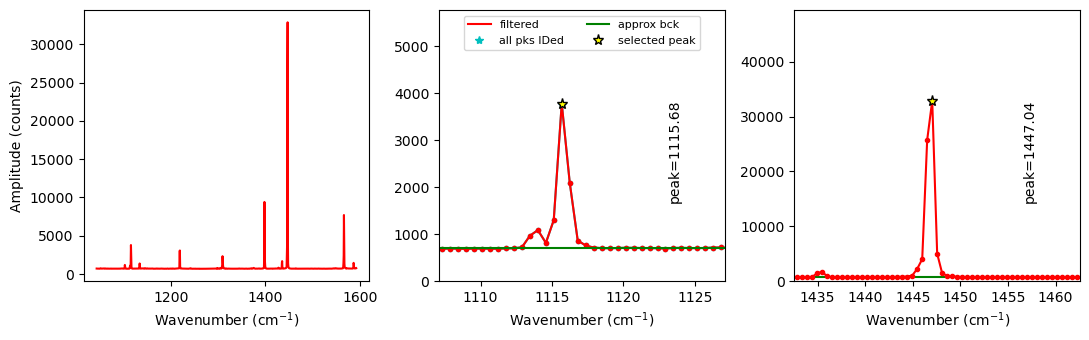

In [10]:
Neon_id_config_1117_1447=pf.Neon_id_config(height=10,  distance=1, prominence=10, 
            width=1, threshold=0.6, 
            peak1_cent=ideal_split_1117_1447['Line_1'].iloc[0],
            peak2_cent=ideal_split_1117_1447['Line_2'].iloc[0], n_peaks=6)
Neon_id_config_1117_1447

Ne_1117_1447, df_fit_params_1117_1447=pf.identify_Ne_lines(Ne_array=test,
config=Neon_id_config_1117_1447, print_df=False)
df_fit_params_1117_1447

,Peak1_cent,Peak1_height,Peak2_cent,Peak2_height,Peak1_prom,Peak2_prom
0,1219.18,3074.33,1309.39,2327.0,2365.33,1618.0


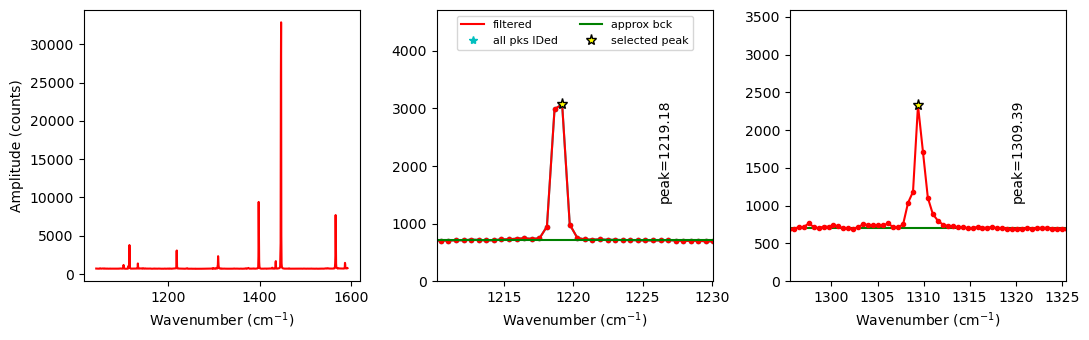

In [11]:
Neon_id_config_1220_1310=pf.Neon_id_config(height=10,  distance=1, prominence=10, 
            width=1, threshold=0.6, 
            peak1_cent=ideal_split_1220_1310['Line_1'].iloc[0],
            peak2_cent=ideal_split_1220_1310['Line_2'].iloc[0], n_peaks=6)
Neon_id_config_1220_1310

Ne_1220_1310, df_fit_params_1220_1310=pf.identify_Ne_lines(Ne_array=test,
config=Neon_id_config_1220_1310, print_df=False)
df_fit_params_1220_1310

,Peak1_cent,Peak1_height,Peak2_cent,Peak2_height,Peak1_prom,Peak2_prom
0,1398.04,9411.67,1566.17,7702.0,8710.7697,7001.0997


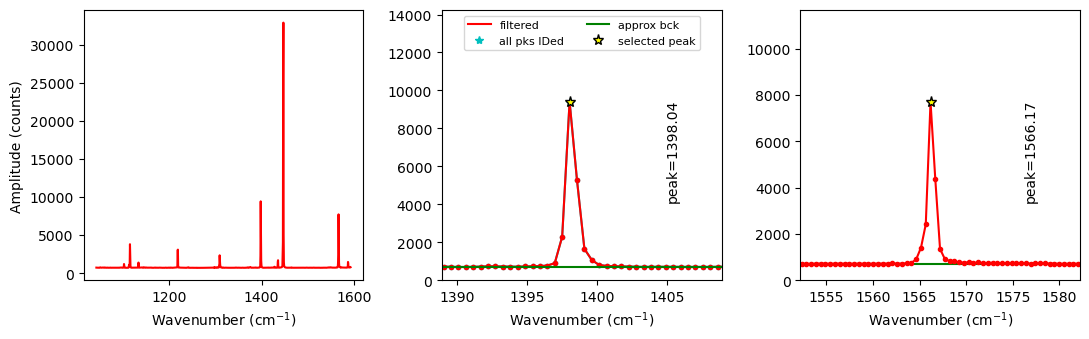

In [12]:
Neon_id_config_1400_1567=pf.Neon_id_config(height=10,  distance=1, prominence=10, 
            width=1, threshold=0.6, 
            peak1_cent=ideal_split_1400_1567['Line_1'].iloc[0],
            peak2_cent=ideal_split_1400_1567['Line_2'].iloc[0], n_peaks=6)
Neon_id_config_1400_1567

Ne_1400_1567, df_fit_params_1400_1567=pf.identify_Ne_lines(Ne_array=test,
config=Neon_id_config_1400_1567, print_df=False)
df_fit_params_1400_1567

### Tweak peak parameters
- One important thing is the background positions, these are defined relative to the peak position. Once you tweak them for each instrument, you chould be good to go. 
- Another thing is how many peaks you want for Peak1, 'peaks_1', for the 1117 line, you'll need 2 if you have the clear secondary peak seen above. 

## 1117-1447 fitting

,filename,1σ_Ne_Corr_test,1σ_Ne_Corr,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,Peak2_Prop_Lor,pk1_peak_cent,...,pk1_gamma,error_pk1,Peak1_Prop_Lor,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_pk2,residual_pk1,residual_pk1+pk2
0,test,0.000043,0.000043,1446.82102,37884.413404,0.365608,None,0.00222,0.424841,1115.788766,...,None,0.014179,0.366393,331.032253,0.998325,0.998275,0.998374,86.769964,7.714107,94.484071


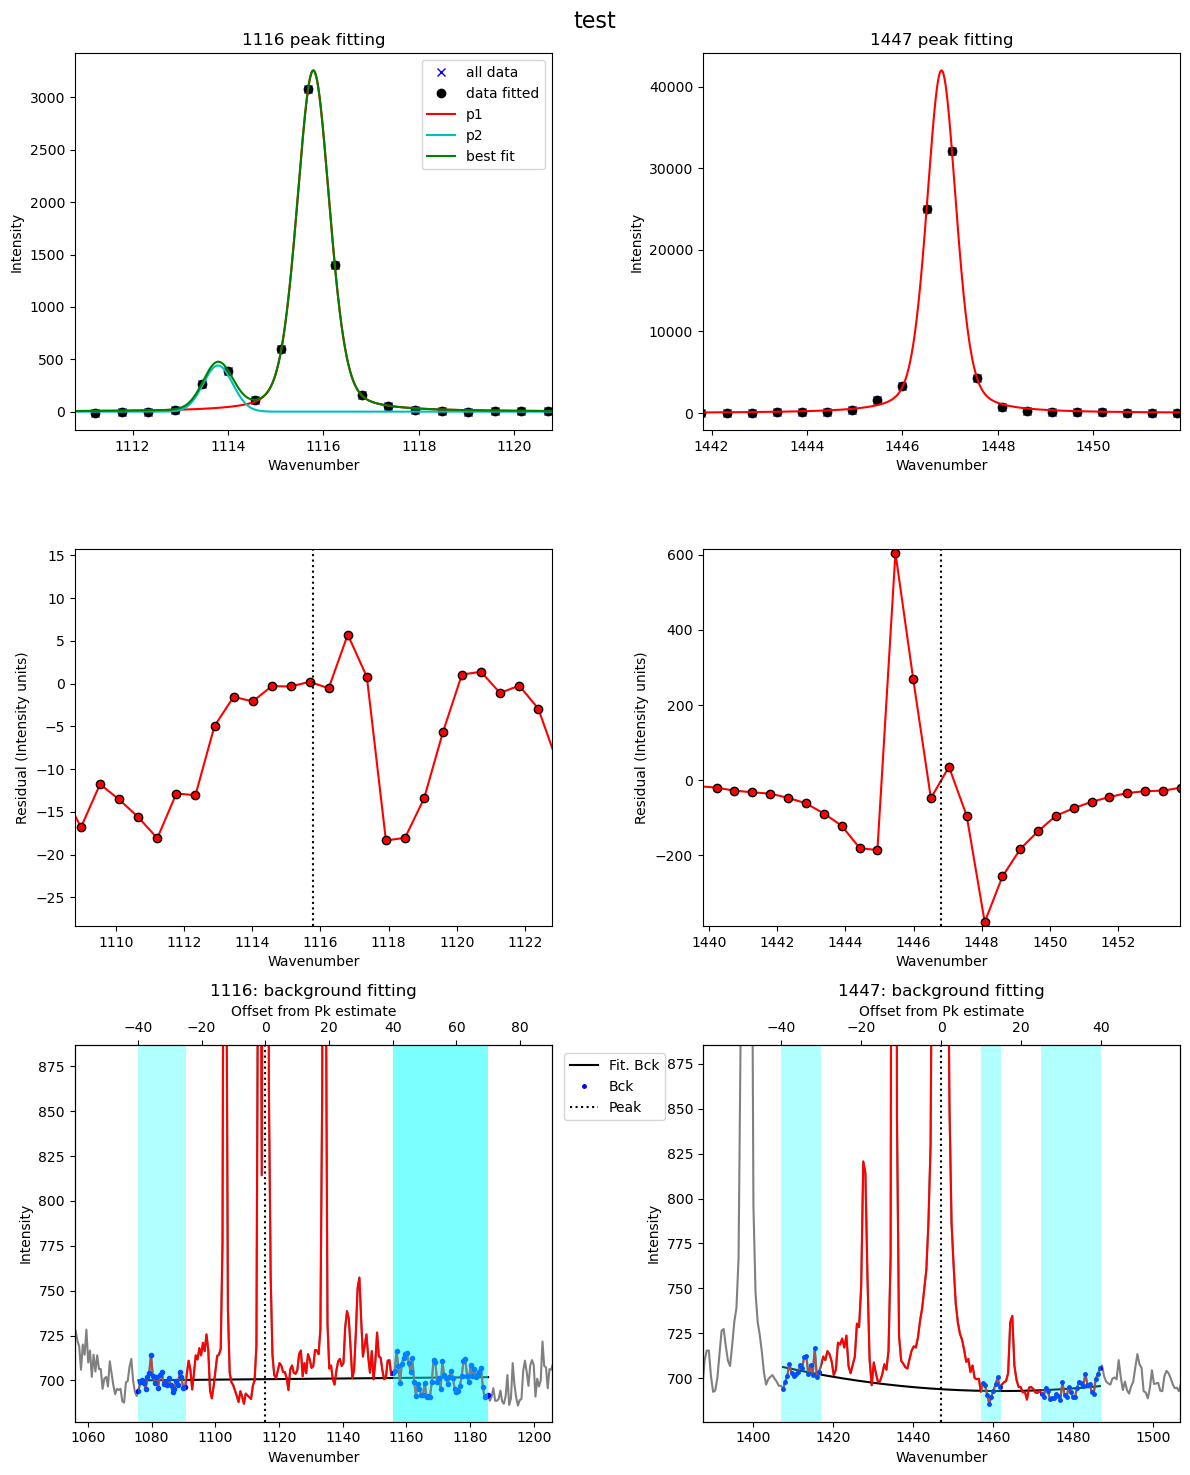

In [13]:
model_name='PseudoVoigtModel'
Ne_Config_est_1117_1447=pf.Ne_peak_config(model_name=model_name,
 DeltaNe_ideal=ideal_split_1117_1447['Ne_Split'], peaks_1=2, LH_offset_mini=[2, 5],
pk1_sigma=0.6, pk2_sigma=0.5,
lower_bck_pk1=(-40, -25), upper_bck1_pk1=[40, 70], upper_bck2_pk1=[40, 70],
lower_bck_pk2=[-40, -30], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40],
x_range_peak=5, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10],
N_poly_pk2_baseline=2 )
i=0
df_test_params=pf.fit_Ne_lines(Ne=Ne_1117_1447, filename='test',
path=spectra_path, prefix=False,
config=Ne_Config_est_1117_1447,
    Ne_center_1=df_fit_params_1117_1447['Peak1_cent'].iloc[i], 
    Ne_center_2=df_fit_params_1117_1447['Peak2_cent'].iloc[i],
    Ne_prom_1=df_fit_params_1117_1447['Peak1_prom'].iloc[i],
    Ne_prom_2=df_fit_params_1117_1447['Peak2_prom'].iloc[i],
    const_params=False)                                                                 
                                                                     
display(df_test_params)

In [14]:
df_fit_params_1220_1310['Peak2_cent']

0    1309.39
Name: Peak2_cent, dtype: float64

,filename,1σ_Ne_Corr_test,1σ_Ne_Corr,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,Peak2_Prop_Lor,pk1_peak_cent,...,pk1_gamma,error_pk1,Peak1_Prop_Lor,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_pk2,residual_pk1,residual_pk1+pk2
0,test,0.000184,0.000184,1309.5378,2611.015379,0.466477,None,0.0166,1.0,1218.912405,...,None,0.001521,0.397947,90.625395,0.997212,0.997013,0.997412,23.594273,13.936747,37.53102


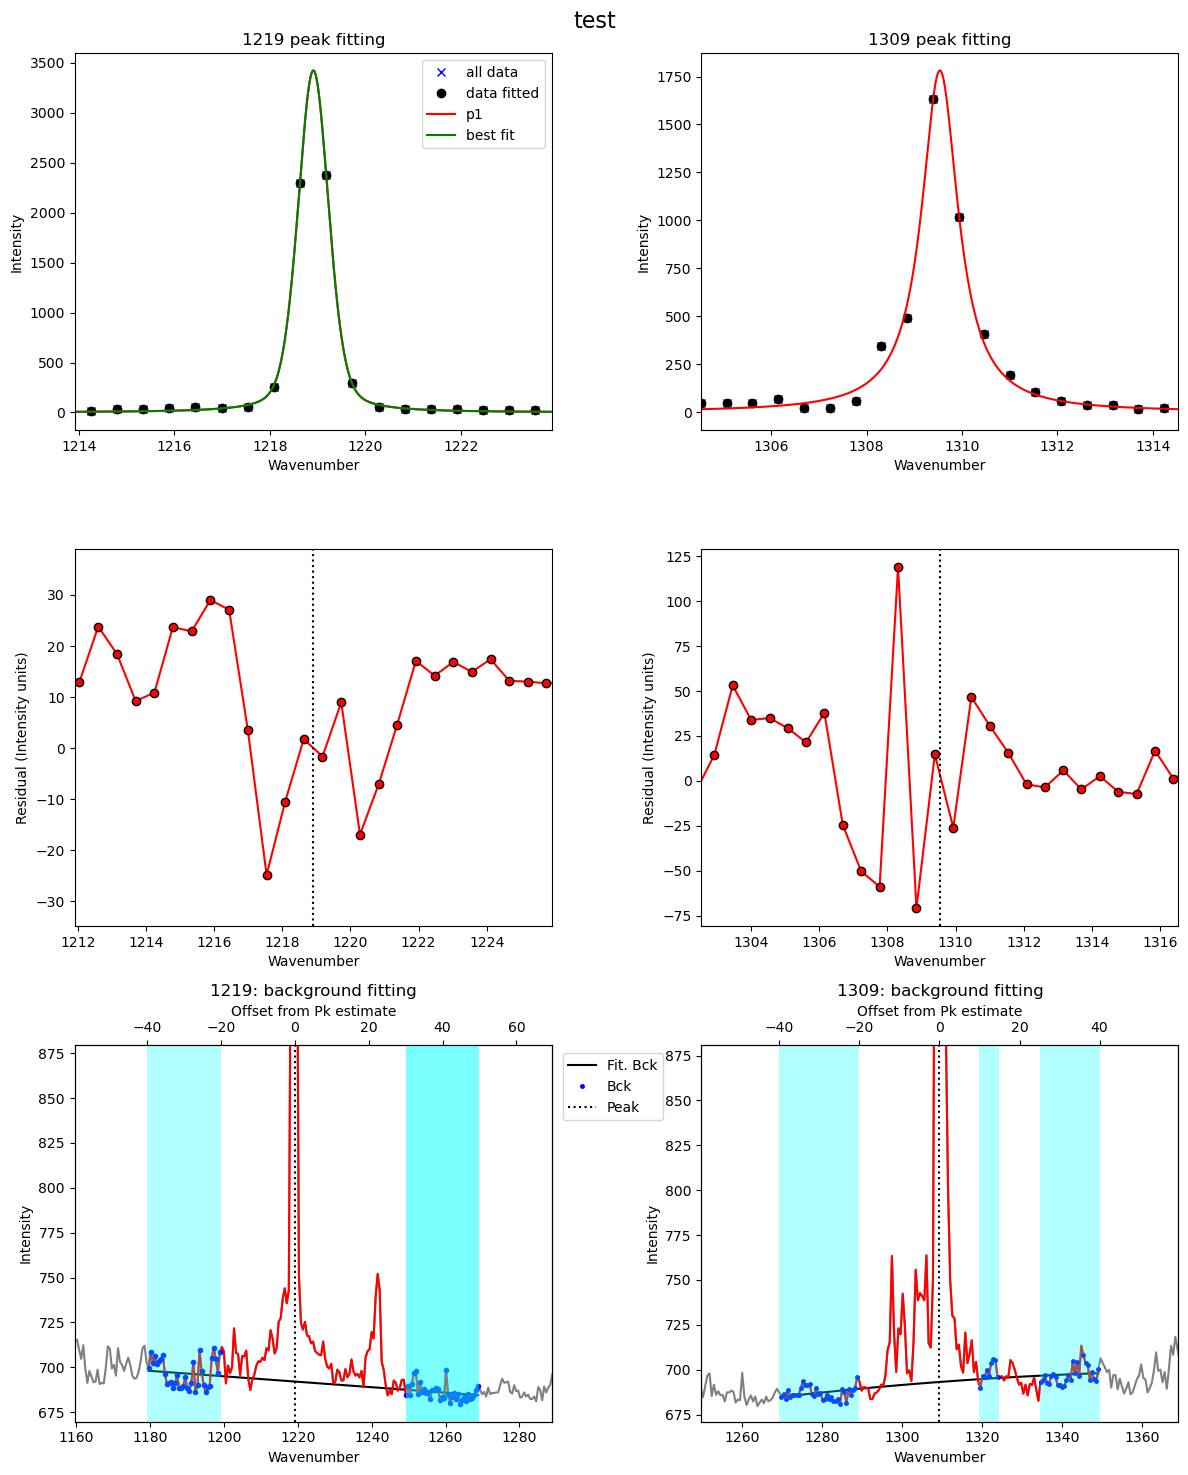

In [15]:
model_name='PseudoVoigtModel'
Ne_Config_est_1220_1310=pf.Ne_peak_config(model_name=model_name,
 DeltaNe_ideal=ideal_split_1220_1310['Ne_Split'], peaks_1=1, LH_offset_mini=[2, 5],
pk1_sigma=0.6, pk2_sigma=0.5,
lower_bck_pk1=(-40, -20), upper_bck1_pk1=[30, 50], upper_bck2_pk1=[30, 50],
lower_bck_pk2=[-40, -20], upper_bck1_pk2=[10, 15], upper_bck2_pk2=[25, 40],
x_range_peak=5, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10],
N_poly_pk2_baseline=2 )
i=0
df_test_params=pf.fit_Ne_lines(Ne=Ne_1220_1310, filename='test',
path=spectra_path, prefix=False,
config=Ne_Config_est_1220_1310,
    Ne_center_1=df_fit_params_1220_1310['Peak1_cent'].iloc[i], 
    Ne_center_2=df_fit_params_1220_1310['Peak2_cent'].iloc[i],
    Ne_prom_1=df_fit_params_1220_1310['Peak1_prom'].iloc[i],
    Ne_prom_2=df_fit_params_1220_1310['Peak2_prom'].iloc[i],
    const_params=False)                                                                 
                                                                     
display(df_test_params)

## 1400-1567

,filename,1σ_Ne_Corr_test,1σ_Ne_Corr,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,Peak2_Prop_Lor,pk1_peak_cent,...,pk1_gamma,error_pk1,Peak1_Prop_Lor,deltaNe,Ne_Corr,Ne_Corr_min,Ne_Corr_max,residual_pk2,residual_pk1,residual_pk1+pk2
0,test,0.000037,0.000037,1566.282797,7831.949593,0.387267,None,0.00482,0.647219,1398.182217,...,None,0.003847,0.568053,168.10058,1.001126,1.001074,1.001178,28.307556,41.929408,70.236964


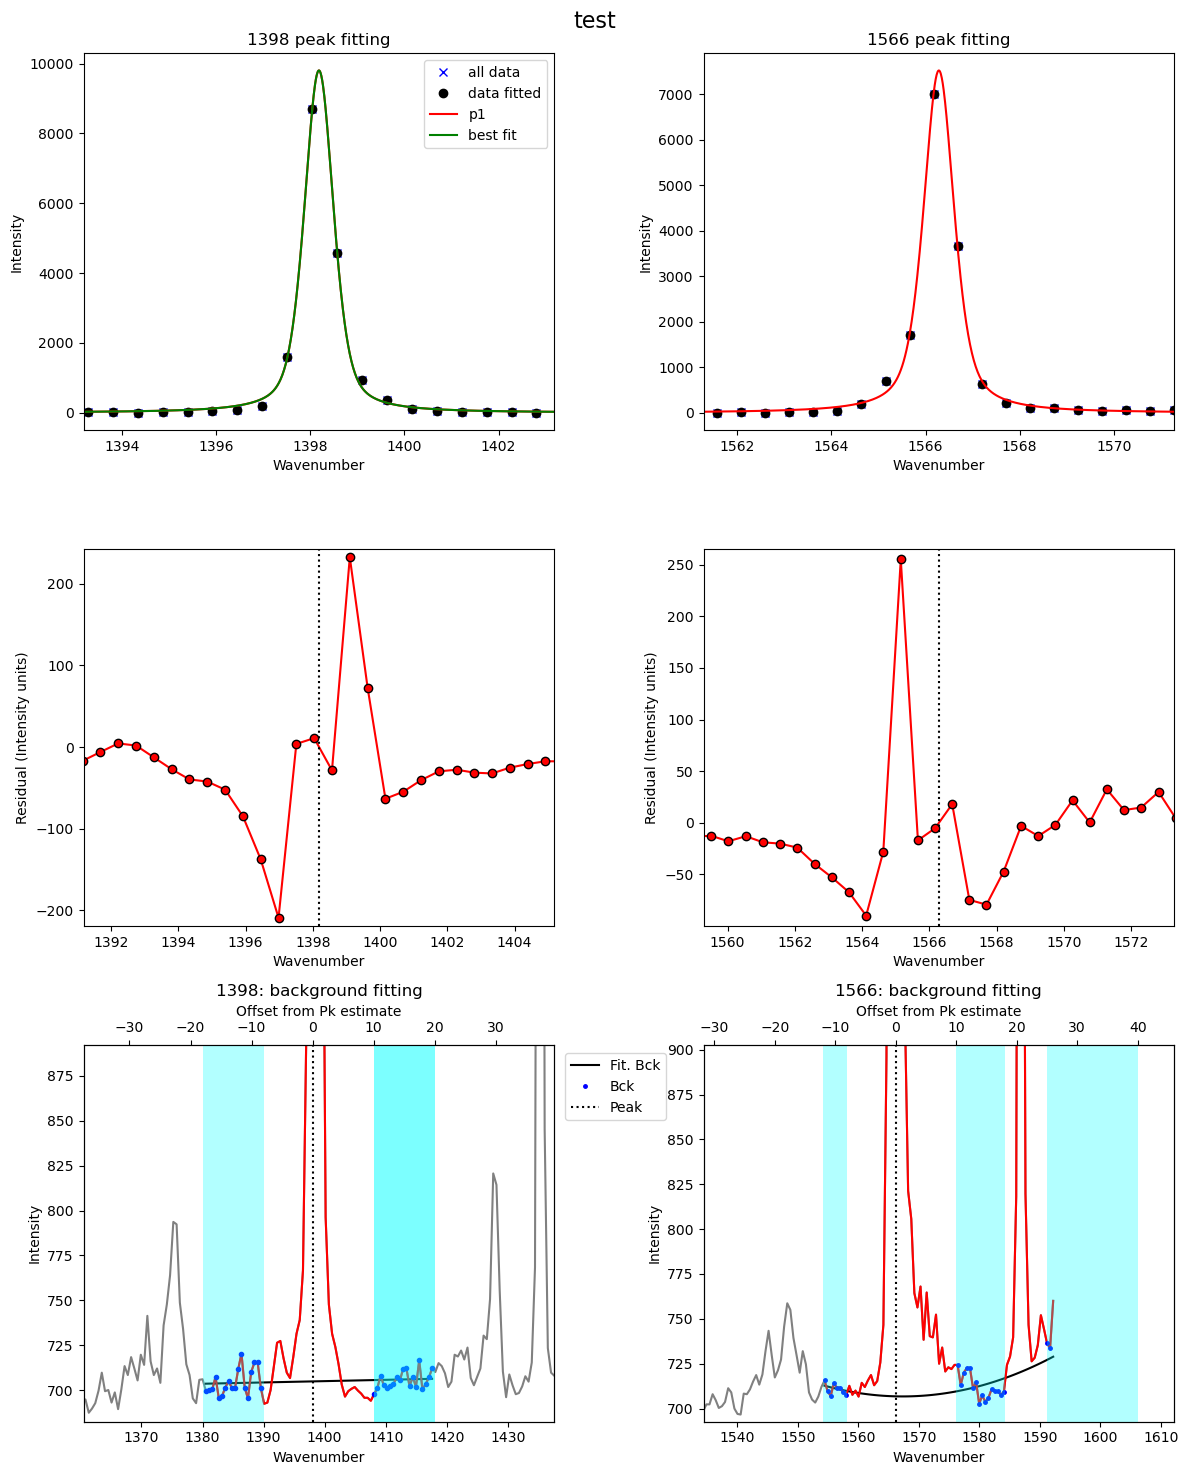

In [16]:
model_name='PseudoVoigtModel'
Ne_Config_est_1400_1567=pf.Ne_peak_config(model_name=model_name,
 DeltaNe_ideal=ideal_split_1400_1567['Ne_Split'], peaks_1=1, LH_offset_mini=[2, 5],
pk1_sigma=0.6, pk2_sigma=0.5,
lower_bck_pk1=(-18, -8), upper_bck1_pk1=[10, 20], upper_bck2_pk1=[10, 20],
pk2_sigma=0.5,lower_bck_pk2=[-12, -8], upper_bck1_pk2=[10, 18], upper_bck2_pk2=[10, 18],
x_range_peak=5, x_span_pk1=[-10, 8], x_span_pk2=[-10, 10],
N_poly_pk2_baseline=1 )
i=0
df_test_params=pf.fit_Ne_lines(Ne=Ne_1400_1567, filename='test',
path=spectra_path, prefix=False,
config=Ne_Config_est_1400_1567,
    Ne_center_1=df_fit_params_1400_1567['Peak1_cent'].iloc[i], 
    Ne_center_2=df_fit_params_1400_1567['Peak2_cent'].iloc[i],
    Ne_prom_1=df_fit_params_1400_1567['Peak1_prom'].iloc[i],
    Ne_prom_2=df_fit_params_1400_1567['Peak2_prom'].iloc[i],
    const_params=False)                                                                 
                                                                     
display(df_test_params)

In [17]:
df2_1117_1447=pf.loop_Ne_lines(files=files, 
spectra_path=spectra_path, 
filetype='headless_txt', config_ID_peaks=Neon_id_config_1117_1447, 
config=Ne_Config_est_1117_1447,
df_fit_params=df_fit_params_1117_1447,                    
plot_figure=False, single_acq=True)

  0%|          | 0/179 [00:00<?, ?it/s]

In [18]:
df2_1220_1310=pf.loop_Ne_lines(files=files, 
spectra_path=spectra_path, 
filetype='headless_txt', config_ID_peaks=Neon_id_config_1220_1310, 
config=Ne_Config_est_1220_1310,
df_fit_params=df_fit_params_1220_1310,                    
plot_figure=False, single_acq=True)

  0%|          | 0/179 [00:00<?, ?it/s]

In [19]:
df2_1400_1567=pf.loop_Ne_lines(files=files, 
spectra_path=spectra_path, 
filetype='headless_txt', config_ID_peaks=Neon_id_config_1400_1567, 
config=Ne_Config_est_1400_1567,
df_fit_params=df_fit_params_1400_1567,                    
plot_figure=False, single_acq=True)

  0%|          | 0/179 [00:00<?, ?it/s]

In [27]:
## Ideal positions
Ideal_1117=ideal_split_1117_1447['Line_1']
Ideal_1447=ideal_split_1117_1447['Line_2']
Ideal_1220=ideal_split_1220_1310['Line_1']
Ideal_1310=ideal_split_1220_1310['Line_2']
Ideal_1400=ideal_split_1400_1567['Line_1']
Ideal_1567=ideal_split_1400_1567['Line_2']

## Lets filer these

In [45]:
df2_1220_1310.columns

Index(['filename', 'Ne_Corr', '1σ_Ne_Corr', 'deltaNe', 'pk2_peak_cent',
       'pk1_peak_cent', 'pk2_amplitude', 'pk1_amplitude', 'residual_pk2',
       'residual_pk1', '1σ_Ne_Corr_test', 'pk2_sigma', 'pk2_gamma',
       'error_pk2', 'Peak2_Prop_Lor', 'pk1_sigma', 'pk1_gamma', 'error_pk1',
       'Peak1_Prop_Lor', 'Ne_Corr_min', 'Ne_Corr_max', 'residual_pk1+pk2'],
      dtype='object')

In [57]:
Corr_factor_1310=Ideal_1310.values/df2_1220_1310['pk2_peak_cent']
Corr_factor_1220=Ideal_1220.values/df2_1220_1310['pk1_peak_cent']
Corr_factor_1400=Ideal_1400.values/df2_1400_1567['pk1_peak_cent']
Corr_factor_1567=Ideal_1567.values/df2_1400_1567['pk2_peak_cent']
Corr_factor_1447=Ideal_1447.values/df2_1117_1447['pk2_peak_cent']
Corr_factor_1117=Ideal_1117.values/df2_1117_1447['pk1_peak_cent']

# Now lets calculate the uncertainty on these

Corr_factor_1310_err=np.abs(Ideal_1310.values/(df2_1220_1310['pk2_peak_cent']**2))*df2_1220_1310['error_pk2']
Corr_factor_1220_err=np.abs(Ideal_1220.values/(df2_1220_1310['pk1_peak_cent']**2))*df2_1220_1310['error_pk1']
Corr_factor_1400_err=np.abs(Ideal_1400.values/(df2_1400_1567['pk1_peak_cent']**2))*df2_1400_1567['error_pk1']
Corr_factor_1567_err=np.abs(Ideal_1567.values/(df2_1400_1567['pk2_peak_cent']**2))*df2_1400_1567['error_pk2']
Corr_factor_1447_err=np.abs(Ideal_1447.values/(df2_1117_1447['pk2_peak_cent']**2))*df2_1117_1447['error_pk2']
Corr_factor_1117_err=np.abs(Ideal_1117.values/(df2_1117_1447['pk1_peak_cent']**2))*df2_1117_1447['error_pk1']



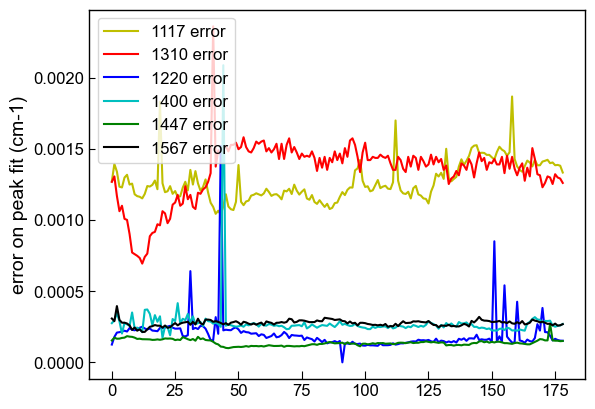

In [72]:
plt.plot(Corr_factor_1117_err.index, 100*Corr_factor_1117_err/Corr_factor_1117, '-y', label='1117 error')
plt.plot(Corr_factor_1310_err.index, 100*Corr_factor_1310_err/Corr_factor_1310, '-r', label='1310 error')
plt.plot(Corr_factor_1220_err.index, 100*Corr_factor_1220_err/Corr_factor_1220, '-b', label='1220 error')
plt.plot(Corr_factor_1400_err.index, 100*Corr_factor_1400_err/Corr_factor_1400, '-c', label='1400 error')
plt.plot(Corr_factor_1447_err.index, 100*Corr_factor_1447_err/Corr_factor_1447, '-g', label='1447 error')
plt.plot(Corr_factor_1567_err.index, 100*Corr_factor_1567_err/Corr_factor_1567, '-k', label='1567 error')
plt.ylabel('error on peak fit (cm-1)')
plt.legend()

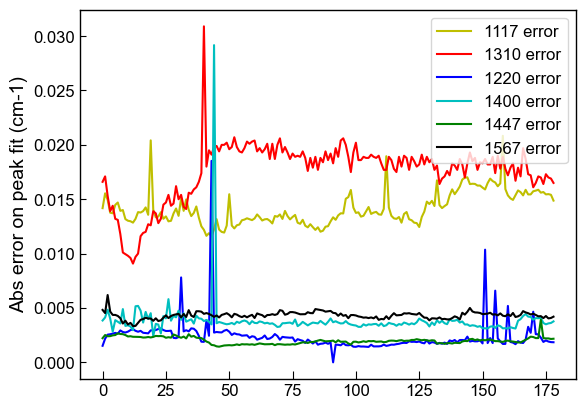

In [73]:
plt.plot(Corr_factor_1117_err.index, df2_1117_1447['error_pk1'], '-y', label='1117 error')
plt.plot(Corr_factor_1310_err.index, df2_1220_1310['error_pk2'], '-r', label='1310 error')
plt.plot(Corr_factor_1220_err.index, df2_1220_1310['error_pk1'], '-b', label='1220 error')
plt.plot(Corr_factor_1400_err.index, df2_1400_1567['error_pk1'], '-c', label='1400 error')
plt.plot(Corr_factor_1447_err.index, df2_1117_1447['error_pk2'], '-g', label='1447 error')
plt.plot(Corr_factor_1567_err.index, df2_1400_1567['error_pk2'], '-k', label='1567 error')
plt.ylabel('Abs error on peak fit (cm-1)')
plt.legend()

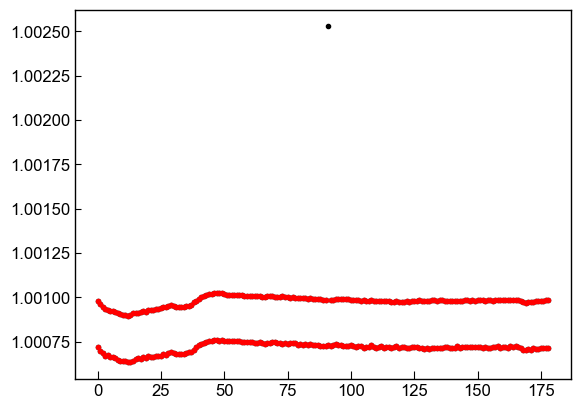

In [33]:


df2_1310_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1310, number_av=6, offset=0.00009)
plt.plot(df2_1220_1310.index,Corr_factor_1310, '.k')
plt.plot(df2_1310_filt.index, df2_1310_filt, '.r')



df2_1220_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1220, number_av=6, offset=0.00009)
plt.plot(df2_1220_1310.index,Corr_factor_1220, '.k')
plt.plot(df2_1220_filt.index, df2_1220_filt, '.r')

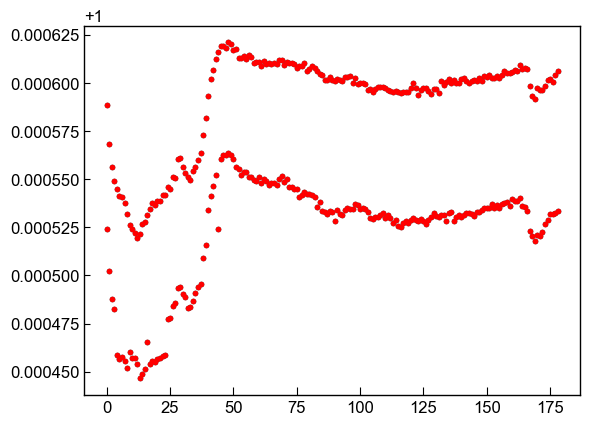

In [34]:


df2_1567_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1567, number_av=6, offset=0.00009)
plt.plot(df2_1400_1567.index,Corr_factor_1567, '.k')
plt.plot(df2_1567_filt.index, df2_1567_filt, '.r')



df2_1400_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1400, number_av=6, offset=0.00009)
plt.plot(df2_1400_1567.index,Corr_factor_1400, '.k')
plt.plot(df2_1400_filt.index, df2_1400_filt, '.r')

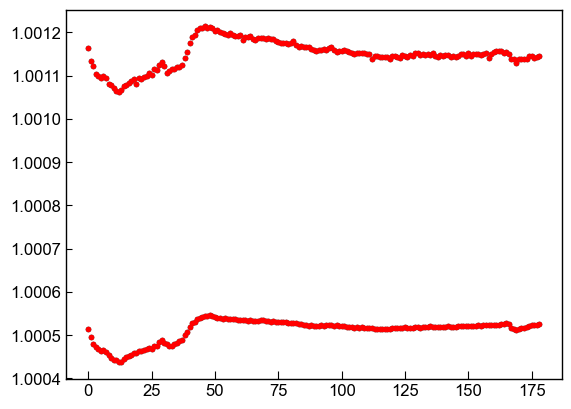

In [35]:


df2_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1447, number_av=6, offset=0.00009)
plt.plot(df2_1117_1447.index,Corr_factor_1447, '.k')
plt.plot(df2_1447_filt.index, df2_1447_filt, '.r')


df2_1117_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_factor_1117, number_av=6, offset=0.00009)
plt.plot(df2_1117_1447.index,Corr_factor_1117, '.k')
plt.plot(df2_1117_filt.index, df2_1117_filt, '.r')

## Now make a dataframe for easy looping

In [36]:
corr_factor=pd.DataFrame(data={'1117_Corr': df2_1117_filt,
                               '1220_Corr': df2_1220_filt,
                              '1310_Corr': df2_1310_filt,
                              
                            '1400_Corr': df2_1400_filt,
                             
                              '1447_Corr': df2_1447_filt,
                                 '1567_Corr': df2_1567_filt})
sumro=corr_factor.sum(axis=1)
#corr_factor_Filt=corr_factor[(sumro>3.9) & (sumro<4.1)]
corr_factor_Filt=corr_factor #[(sumro>5.9) & (sumro<6.1)]

corr_peaks=pd.DataFrame(data={
'1117_peak':Ideal_1117,
'1220_peak':Ideal_1220,
'1310_peak': Ideal_1310,   
'1400_peak': Ideal_1400,
'1447_peak':Ideal_1447,
'1567_peak': Ideal_1567})
 


## Now working out ideal positions

In [37]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =12
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 4 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 12 # Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 14 # Overall title
plt.rcParams["axes.labelsize"] = 14 # Axes labels

In [39]:
ExampleDiad=pf.get_data(path=spectra_path,
        filename='15 MP2_64_FIF_8mW.txt', filetype='headless_txt')

In [40]:
np.linspace(0, len(Ne_1400_1567), len(Ne_1400_1567)+1)

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.021e+03, 1.022e+03,
       1.023e+03])

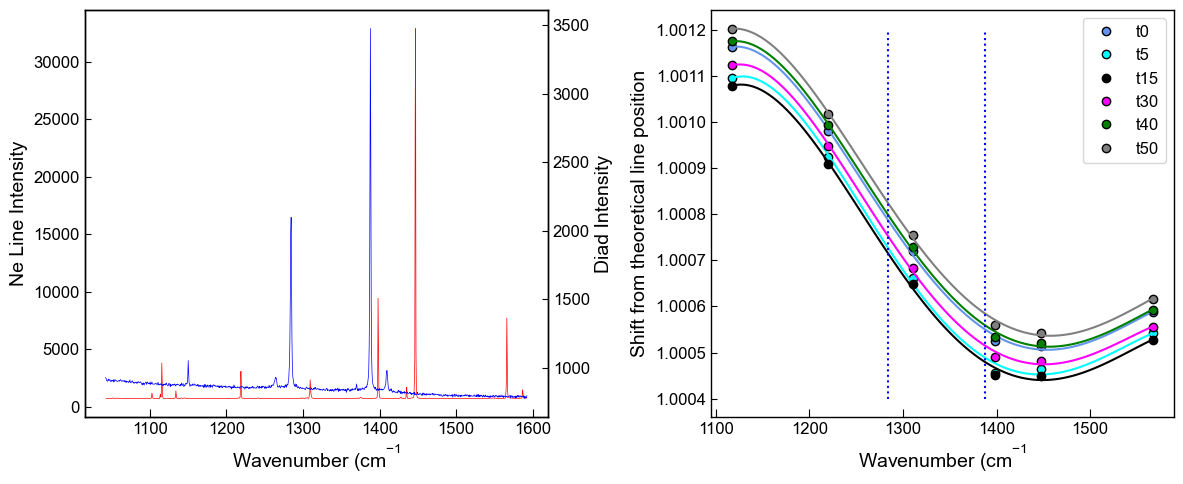

In [41]:
fig, ((ax0, ax1)) = plt.subplots(1,2, figsize = (12,5)) # adjust dimensions of figure here
# Where are the Neon lines?
ax1.errorbar(Ne_1400_1567[:, 0], Ne_1400_1567[:, 1], xerr=, yerr,,
             fmt='d', ecolor='k', elinewidth=0.8, mfc='cyan', ms=10, mec='k')
Ne_1400_1567
ax0.plot(Ne_1400_1567[:, 0], Ne_1400_1567[:, 1], '-r', lw=0.5)

ax0b=ax0.twinx()
ax0b.plot(ExampleDiad[:, 0], ExampleDiad[:, 1], '-b', lw=0.5)
# How are the different lines drifting?
color=['red', 'cornflowerblue', 'cyan', 'black', 'magenta', 'green', 'grey']
n=0
diad1_pos=1284.33298631764
diad2_pos=1388.0707023396
ivals=[0, 5, 15, 30, 40, 50]


for i in ivals:
    n=n+1
    text='t'+str(i)
    x=np.array(corr_peaks.iloc[0].values)
    y=corr_factor_Filt.iloc[i].values
    Pf=np.poly1d(np.polyfit(x, y,
                              4))
    Px = np.linspace(1117, 1567, 100)
    Py = Pf(Px)

    ax1.plot(x, y, 'ok', mfc=color[n], label=text)
    ax1.plot(Px, Py, '-', color=color[n])
    ax1.legend()
    
ax1.plot([diad1_pos, diad1_pos], 
         [1.0004, 1.0012], ':b')

ax1.plot([diad2_pos, diad2_pos], 
         [1.0004, 1.0012], ':b')
ax1.ticklabel_format(useOffset=False)
ax0.set_xlabel('Wavenumber (cm$^{-1}$')
ax1.set_xlabel('Wavenumber (cm$^{-1}$')
ax1.set_ylabel('Shift from theoretical line position')
ax0.set_ylabel('Ne Line Intensity')
ax0b.set_ylabel('Diad Intensity')

#ax2.plot(5, 5, 'ok')

fig.tight_layout()
fig.savefig('Bakker_method.png', dpi=200)

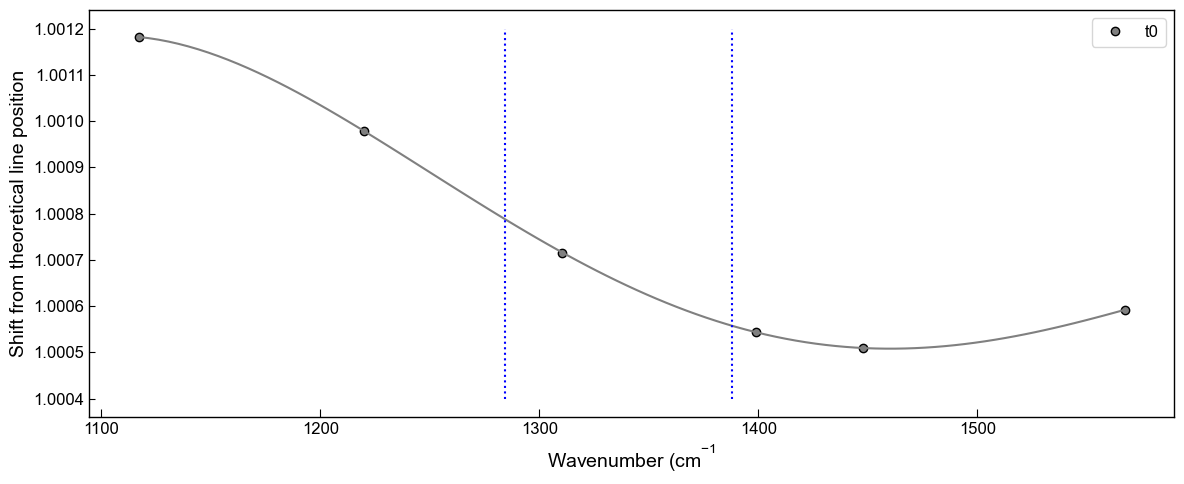

In [ ]:
fig, ((ax1)) = plt.subplots(1,1, figsize = (12,5)) # adjust dimensions of figure here
# Where are the Neon lines?

# How are the different lines drifting?
color=['grey']
n=0
diad1_pos=1284.33298631764
diad2_pos=1388.0707023396
ivals=[0,]


for i in ivals:
    n=n+1
    text='t'+str(i)
    x=np.array(corr_peaks.iloc[0].values)
    y=corr_factor_Filt.iloc[i].values
    Pf=np.poly1d(np.polyfit(x, y,
                              4))
    Px = np.linspace(1117, 1567, 100)
    Py = Pf(Px)

    ax1.plot(x, y, 'ok', mfc='grey', label=text)
    ax1.plot(Px, Py, '-', color='grey')
    ax1.legend()
    
ax1.plot([diad1_pos, diad1_pos], 
         [1.0004, 1.0012], ':b')

ax1.plot([diad2_pos, diad2_pos], 
         [1.0004, 1.0012], ':b')
ax1.ticklabel_format(useOffset=False)
ax0.set_xlabel('Wavenumber (cm$^{-1}$')
ax1.set_xlabel('Wavenumber (cm$^{-1}$')
ax1.set_ylabel('Shift from theoretical line position')
ax0.set_ylabel('Ne Line Intensity')
ax0b.set_ylabel('Diad Intensity')



fig.tight_layout()
fig.savefig('Bakker_method2.png', dpi=200)

In [ ]:
shift_1281=Pf(1281)
shift_1281

1.0007974058616074

In [ ]:
shift_1287=Pf(1287)
shift_1287

1.0007802028010553

In [ ]:
shift_1288=Pf(1288)
shift_1288

1.000777361921249

In [ ]:
shift_1386=Pf(1386)
shift_1386

1.0005603393542288

In [ ]:
shift_1389=Pf(1389)
shift_1389

1.0005561767978486

In [ ]:
# Say split of 104
1281+104==1385

True

In [ ]:
## 

In [ ]:
Pf(1385)*1385-Pf(1281)*1281

103.75656693949009

In [ ]:
Pf(1387)*1387-Pf(1283)*1283

103.75956250817012

In [ ]:
Pf(1389)*1389-Pf(1285)*1285

103.7626380129202

## Looping over all i

In [ ]:
# How are the different lines drifting?
color=['red', 'blue', 'cyan', 'black', 'magenta', 'green', 'grey']
n=0
diad1_pos=1284.33298631764
diad2_pos=1388.0707023396
#ivals=[0, 1, 2, 3, 4, 5, 10, 15, 20, 50, 100, 120]
corr_diad1=np.empty(len(corr_factor_Filt), dtype=float)
corr_diad2=np.empty(len(corr_factor_Filt), dtype=float)
xset=np.empty(len(corr_factor_Filt), dtype=float)

for i in range(0, len(corr_factor_Filt)):
    n=n+1
    text='t'+str(i)
    x=np.array(corr_peaks.iloc[0].values)
    y=corr_factor_Filt.iloc[i].values
    Pf=np.poly1d(np.polyfit(x, y,
                              4))
    Px = np.linspace(1117, 1567, 100)
    Py = Pf(Px)
    corr_diad1[i]=Pf(diad1_pos)
    corr_diad2[i]=Pf(diad2_pos)
    xset[i]=i
    # ax1.plot(x, y, 'ok', mfc=color[n], label=text)
    # ax1.plot(Px, Py, '-', color=color[n])
    # ax1.legend()
    


LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
print('Measured split')
print(Split_original)

Measured split
103.73771602196007


In [ ]:
Split_original=diad2_pos-diad1_pos
Split_after=diad2_pos*corr_diad2-diad1_pos*corr_diad1
Corr_Bakker=Split_after/Split_original

In [ ]:
Split_after[0]

103.49967374218295

In [ ]:
Split_original

103.73771602196007

## Calculating corrections

In [ ]:
Corr_1220_1400=((Ideal_1400[0]-Ideal_1220[0])/((Ideal_1400[0]/df2_1400_filt)-(Ideal_1220[0]/df2_1220_filt)))
Corr_1220_1400_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1220_1400, number_av=6, offset=0.00009)

Corr_1220_1447=((Ideal_1447[0]-Ideal_1220[0])/((Ideal_1447[0]/df2_1447_filt)-(Ideal_1220[0]/df2_1220_filt)))
Corr_1220_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1220_1447, number_av=6, offset=0.00009)

Corr_1220_1567=((Ideal_1567[0]-Ideal_1220[0])/((Ideal_1567[0]/df2_1567_filt)-(Ideal_1220[0]/df2_1220_filt)))
Corr_1220_1567_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1220_1567, number_av=6, offset=0.00009)

Corr_1117_1400=((Ideal_1400[0]-Ideal_1117[0])/((Ideal_1400[0]/df2_1400_filt)-(Ideal_1117[0]/df2_1117_filt)))
Corr_1117_1400_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1117_1400, number_av=6, offset=0.00009)

Corr_1117_1447=((Ideal_1447[0]-Ideal_1117[0])/((Ideal_1447[0]/df2_1447_filt)-(Ideal_1117[0]/df2_1117_filt)))
Corr_1117_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1117_1447, number_av=6, offset=0.00009)

Corr_1117_1567=((Ideal_1567[0]-Ideal_1117[0])/((Ideal_1567[0]/df2_1567_filt)-(Ideal_1117[0]/df2_1117_filt)))
Corr_1117_1567_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1117_1567, number_av=6, offset=0.00009)

Corr_1310_1400=((Ideal_1400[0]-Ideal_1310[0])/((Ideal_1400[0]/df2_1400_filt)-(Ideal_1310[0]/df2_1310_filt)))
Corr_1310_1400_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1310_1400, number_av=6, offset=0.00009)

Corr_1310_1447=((Ideal_1447[0]-Ideal_1310[0])/((Ideal_1447[0]/df2_1447_filt)-(Ideal_1310[0]/df2_1310_filt)))
Corr_1310_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1310_1447, number_av=6, offset=0.00009)

Corr_1310_1567=((Ideal_1567[0]-Ideal_1310[0])/((Ideal_1567[0]/df2_1567_filt)-(Ideal_1310[0]/df2_1310_filt)))
Corr_1310_1567_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1310_1567, number_av=6, offset=0.00009)

Corr_1400_1447=((Ideal_1447[0]-Ideal_1400[0])/((Ideal_1447[0]/df2_1447_filt)-(Ideal_1400[0]/df2_1400_filt)))
Corr_1400_1447_filt=pf.filter_Ne_Line_neighbours(
Corr_factor=Corr_1400_1447, number_av=6, offset=0.00009)


## Typing out corrections for figure in paper

In [ ]:
## Using line segment method
Corr_1117_1567[0]*Split_original

103.64766655273621

In [ ]:
## Using line segment method
print(Corr_1400_1447[0])
print(Corr_1400_1447[0]*Split_original)

0.9995295916638106
103.68891693556608


In [ ]:
## Using line segment method
print(Corr_1117_1447[0])
Corr_1117_1447[0]*Split_original

0.998244553927977


103.55561005584867

In [ ]:
## Using line segment method
print(Corr_1220_1400[0])
Corr_1220_1400[0]*Split_original

0.9975908719109232


103.4877985763949

In [ ]:
## Using line segment method
print(Corr_1117_1400[0])
Corr_1117_1400[0]*Split_original

0.998023063622891


103.53263315747805

# Corr_Bakker[0]

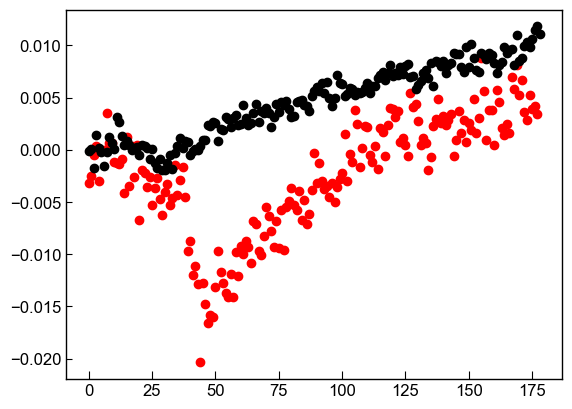

In [ ]:
plt.plot(xset, Diad_Corr_Bakker-np.median(Diad_Corr_Bakker[0:10]), 'or')
plt.plot(Corr_1117_1447.index, Diad_Corr_Lam-np.median(Diad_Corr_Lam[0:10]), 'ok')

In [ ]:
df2_1220_1310['pk2_peak_cent'].head()

0    1309.542712
1    1309.573533
2    1309.582642
3    1309.598556
4    1309.589237
Name: pk2_peak_cent, dtype: float64

In [ ]:
Ideal_1310-Ideal_1400

0   -88.434928
dtype: float64

In [ ]:
Corr_1117_1567

0      0.999132
1      0.999131
2      0.999122
3      0.999145
4      0.999139
         ...   
174    0.999229
175    0.999230
176    0.999233
177    0.999238
178    0.999242
Length: 179, dtype: float64

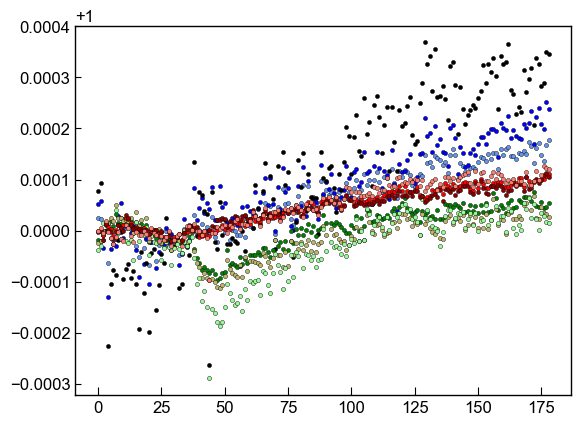

In [ ]:
plt.plot(Corr_1310_1567.index, 
         Corr_1310_1567/np.median(Corr_1310_1567[0:5]), '.', mfc='cornflowerblue', 
         mec='k', mew=0.3, label='1310-1567')
plt.plot(Corr_1310_1447.index, 
         Corr_1310_1447/np.median(Corr_1310_1447[0:5]), '.b', mec='k', mew=0.3, label='1310-1447')
plt.plot(Corr_1310_1400.index, 
         Corr_1310_1400/np.median(Corr_1310_1400[0:5]), '.k', mec='k', mew=0.3, label='1310-1400')

plt.plot(Corr_1220_1567.index, 
         Corr_1220_1567/np.median(Corr_1220_1567[0:5]), '.g', mec='k', mew=0.3, label='1220-1567')
plt.plot(Corr_1220_1447.index, 
         Corr_1220_1447/np.median(Corr_1220_1447[0:5]), '.', mfc='darkkhaki', mec='k', mew=0.3, label='1220-1447')
plt.plot(Corr_1220_1400.index, 
         Corr_1220_1400/np.median(Corr_1220_1400[0:5]), '.', mfc='palegreen',  mec='k', mew=0.3,label='1220-1400')


plt.plot(Corr_1117_1567.index, 
         Corr_1117_1567/np.median(Corr_1117_1567[0:5]), '.r', mec='k', mew=0.3, label='1117-1567')
plt.plot(Corr_1117_1447.index, 
         Corr_1117_1447/np.median(Corr_1117_1447[0:5]), '.', mfc='darkred', mec='k', mew=0.3, label='1117-1447')
plt.plot(Corr_1117_1400.index, 
         Corr_1117_1400/np.median(Corr_1117_1400[0:5]), '.', mfc='salmon',  mec='k', mew=0.3,label='1117-1400')

# plt.legend()

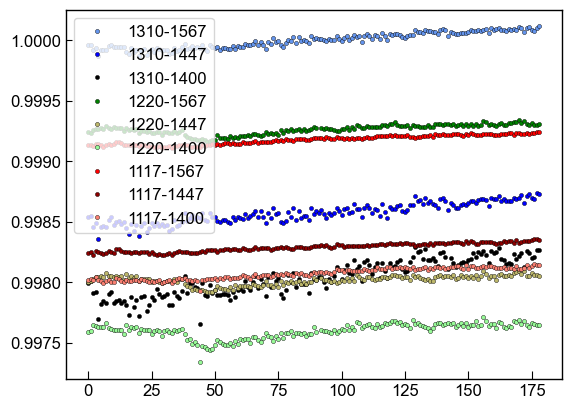

In [ ]:
plt.plot(Corr_1310_1567.index, 
         Corr_1310_1567, '.', mfc='cornflowerblue', 
         mec='k', mew=0.3, label='1310-1567')
plt.plot(Corr_1310_1447.index, 
         Corr_1310_1447, '.b', mec='k', mew=0.3, label='1310-1447')
plt.plot(Corr_1310_1400.index, 
         Corr_1310_1400, '.k', mec='k', mew=0.3, label='1310-1400')

plt.plot(Corr_1220_1567.index, 
         Corr_1220_1567, '.g', mec='k', mew=0.3, label='1220-1567')
plt.plot(Corr_1220_1447.index, 
         Corr_1220_1447, '.', mfc='darkkhaki', mec='k', mew=0.3, label='1220-1447')
plt.plot(Corr_1220_1400.index, 
         Corr_1220_1400, '.', mfc='palegreen',  mec='k', mew=0.3,label='1220-1400')


plt.plot(Corr_1117_1567.index, 
         Corr_1117_1567, '.r', mec='k', mew=0.3, label='1117-1567')
plt.plot(Corr_1117_1447.index, 
         Corr_1117_1447, '.', mfc='darkred', mec='k', mew=0.3, label='1117-1447')
plt.plot(Corr_1117_1400.index, 
         Corr_1117_1400, '.', mfc='salmon',  mec='k', mew=0.3,label='1117-1400')

plt.legend()

In [ ]:
Ne_1400_1567

array([[1043.11 ,  712.667],
       [1043.68 ,  705.333],
       [1044.24 ,  705.333],
       ...,
       [1591.18 ,  736.333],
       [1591.68 ,  733.667],
       [1592.19 ,  760.   ]])

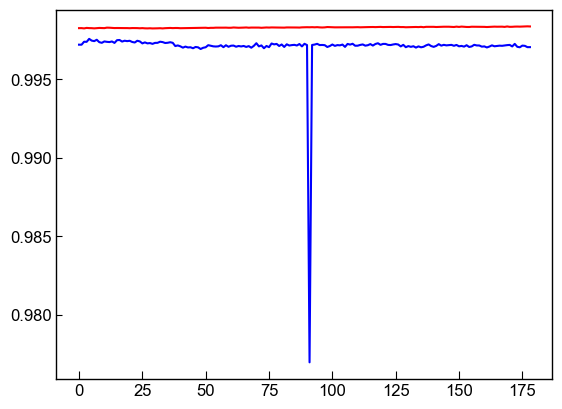

In [ ]:
plt.plot(df2_1117_1447.index, df2_1117_1447['Ne_Corr'], '-r')
plt.plot(df2_1220_1310.index, df2_1220_1310['Ne_Corr'], '-b')

In [ ]:
df2_1117_1447.head()

,filename,Ne_Corr,deltaNe,pk2_peak_cent,pk1_peak_cent,pk2_amplitude,pk1_amplitude,residual_pk2,residual_pk1,pk2_sigma,pk2_gamma,error_pk2,Peak2_Prop_Lor,pk1_sigma,pk1_gamma,error_pk1,Peak1_Prop_Lor,Ne_Corr_min,Ne_Corr_max,residual_pk1+pk2
0,None,0.998245,331.058790,1446.827355,1115.768565,36889.815300,3072.565179,78.738968,26.418959,0.4,None,1,0.283153,0.48,None,NaN,0.000165,NaN,NaN,105.157928
1,None,0.998247,331.058025,1446.857333,1115.799309,36144.455086,2972.958384,89.497863,22.619145,0.4,None,1,0.289912,0.48,None,NaN,0.000062,NaN,NaN,112.117008
2,None,0.998229,331.064065,1446.879012,1115.814947,35517.446944,3007.535939,87.201815,21.910466,0.4,None,1,0.303798,0.48,None,NaN,0.000040,NaN,NaN,109.112280
3,None,0.998260,331.053710,1446.890349,1115.836639,35819.584923,2998.156935,92.033919,19.350406,0.4,None,1,0.300060,0.48,None,NaN,0.000006,NaN,NaN,111.384325
4,None,0.998248,331.057810,1446.898763,1115.840953,35995.667734,2957.912175,96.798187,18.253746,0.4,None,1,0.303065,0.48,None,NaN,0.000019,NaN,NaN,115.051933


## Now extract metadata to get a timestamp for each file

In [ ]:
## Get meta files
Ne_files_meta=pf.get_files(path=meta_path,
file_ext='txt', ID_str='N', 
exclude_str=['diad'], sort=False)

Ne_files_meta[0:5]

['Ne1.txt', 'Ne10.txt', 'Ne11.txt', 'Ne12.txt', 'Ne13.txt']

In [ ]:
meta=pf.stitch_metadata_in_loop_witec(path=meta_path, 
Allfiles=Ne_files_meta, prefix=False)
meta.head()

100%|██████████████████████████████████████████████████████████████████████████████████| 77/77 [00:02<00:00, 32.44it/s]

Done
Oof, try not to work after midnight!


,filename,date,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
64,NE68.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",12:07:01 AM\n,86821.0,1341.0
65,NE69.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '16s']",12:14:20 AM\n,87260.0,1341.0
67,NE70.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",12:21:12 AM\n,87672.0,1341.0
68,NE71.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",12:36:29 AM\n,88589.0,1341.0
69,NE72.txt,"November 29, 2020\n",November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",12:44:10 AM\n,89050.0,1341.0


In [ ]:
# Strip away suffix and prefix if needed
print(meta['filename'][0])

Ne1.txt


In [ ]:
# remove these to get the pure file name you can compare 
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False, str_prefix=None,
   file_type='.txt')
file_m

array(['NE68', 'NE69', 'NE70', 'NE71', 'NE72', 'NE73', 'NE74', 'NE75',
       'NE76', 'NE77', 'Ne1', 'Ne2', 'Ne3', 'Ne4', 'Ne5', 'Ne6', 'Ne7',
       'Ne8', 'Ne9', 'Ne10', 'Ne11', 'Ne12', 'Ne13', 'Ne14', 'Ne15',
       'Ne16', 'Ne17', 'Ne18', 'Ne19', 'Ne20', 'Ne21', 'NE22', 'NE23',
       'NE24', 'NE25', 'NE26', 'NE27', 'NE28', 'NE29', 'NE30', 'NE31',
       'NE32', 'NE33', 'NE34', 'NE35', 'NE36', 'NE37', 'NE38', 'NE39',
       'NE40', 'NE41', 'NE42', 'NE43', 'NE44', 'NE45', 'NE46', 'NE47',
       'NE48', 'NE49', 'NE50', 'NE51', 'NE52', 'NE53', 'NE54', 'NE55',
       'NE56', 'NE57', 'NE58', 'NE59', 'NE60', 'NE61', 'NE62', 'NE63',
       'NE64', 'NE65', 'NE66', 'NE67'], dtype=object)

In [ ]:
# Do the same for spectra, e.g., work out what you need to strip off
print(df2['filename'][0])

Ne1.txt


In [ ]:
file_s=pf.extracting_filenames_generic(names=df2['filename'],
    prefix=False, str_prefix=' ',
   file_type='.txt')
file_s

array(['Ne1', 'Ne10', 'Ne11', 'Ne12', 'Ne13', 'Ne14', 'Ne15', 'Ne16',
       'Ne17', 'Ne18', 'Ne19', 'Ne2', 'Ne20', 'Ne21', 'NE22', 'NE23',
       'NE24', 'NE25', 'NE26', 'NE27', 'NE28', 'NE29', 'Ne3', 'NE30',
       'NE31', 'NE32', 'NE33', 'NE34', 'NE35', 'NE36', 'NE37', 'NE38',
       'NE39', 'Ne4', 'NE40', 'NE41', 'NE42', 'NE43', 'NE44', 'NE45',
       'NE46', 'NE47', 'NE48', 'NE49', 'Ne5', 'NE50', 'NE51', 'NE52',
       'NE53', 'NE54', 'NE55', 'NE56', 'NE57', 'NE58', 'NE59', 'Ne6',
       'NE60', 'NE61', 'NE62', 'NE63', 'NE64', 'NE65', 'NE66', 'NE67',
       'NE68', 'NE69', 'Ne7', 'NE70', 'NE71', 'NE72', 'NE73', 'NE74',
       'NE75', 'NE76', 'NE77', 'Ne8', 'Ne9'], dtype=object)

## Combine 2 dataframes
- Here we add a new column to each dataframe with these stripped back names, and then merge the 2 dataframes

In [ ]:
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

## Now lets inspect changes in Ne correction factor with time
- Normally, you can spot outliers this way

In [ ]:
df_combo_sort=df_combo.sort_values(by='sec since midnight')
df_combo_sort.to_excel('PseudoVoigt.xlsx')

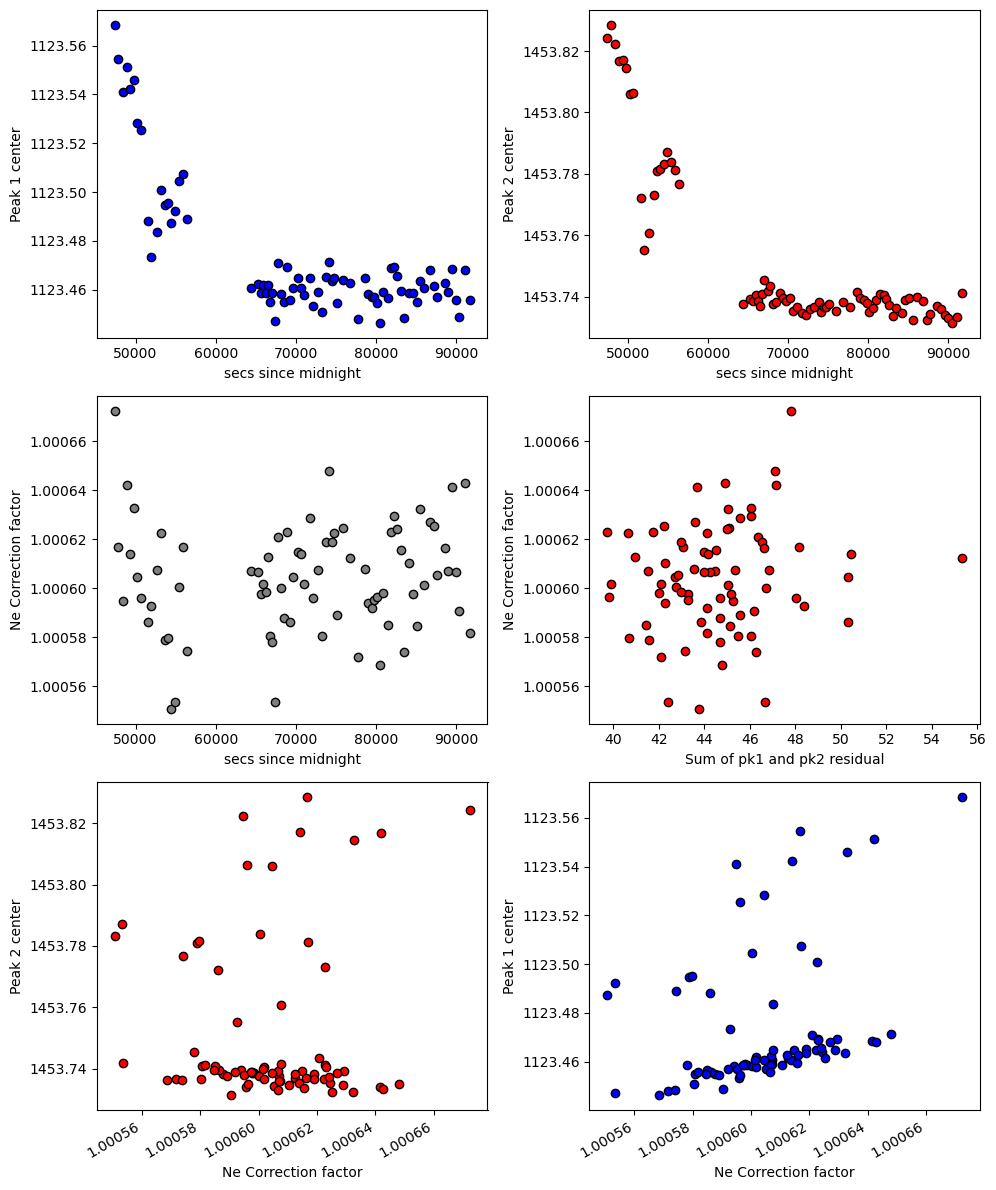

In [ ]:
fig=pf.plot_Ne_corrections(df=df_combo, x_axis=df_combo['sec since midnight'],
                      x_label='secs since midnight')


In [ ]:
df_combo_sort=df_combo.sort_values(by='sec since midnight')
df_combo

,filename_x,pk2_peak_cent,pk2_amplitude,pk2_sigma,pk2_gamma,error_pk2,Peak2_Prop_Lor,pk1_peak_cent,pk1_amplitude,pk1_sigma,...,Month,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center
0,Ne1.txt,1453.824138,21207.720215,0.620329,None,0.00225,0.373899,1123.568548,1446.814895,0.628977,...,November,28.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",1:09:44 PM\n,47384.0,1341.0
1,Ne10.txt,1453.755113,21055.085839,0.631655,None,0.00240,0.354789,1123.473258,1624.144446,0.605182,...,November,28.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",2:26:01 PM\n,51961.0,1341.0
2,Ne11.txt,1453.760641,20116.482403,0.629540,None,0.00237,0.368853,1123.483658,1621.751332,0.632812,...,November,28.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",2:36:59 PM\n,52619.0,1341.0
3,Ne12.txt,1453.772985,19064.192945,0.635765,None,0.00219,0.354856,1123.501004,1465.369375,0.637743,...,November,28.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",2:46:25 PM\n,53185.0,1341.0
4,Ne13.txt,1453.781044,18754.568569,0.631479,None,0.00233,0.367890,1123.494606,1478.965225,0.633105,...,November,28.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",2:53:28 PM\n,53608.0,1341.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,NE75.txt,1453.731504,19630.123092,0.636997,None,0.00258,0.371112,1123.448906,1700.844285,0.646652,...,November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",1:06:41 AM\n,90401.0,1341.0
73,NE76.txt,1453.733395,19420.489840,0.635770,None,0.00244,0.366737,1123.468025,1674.378488,0.640176,...,November,29.0,NaN,45.0,3.0,5.0,"['0h', '2m', '17s']",1:18:29 AM\n,91109.0,1341.0
74,NE77.txt,1453.741119,19094.779621,0.636348,None,0.00233,0.363917,1123.455636,1566.008986,0.630900,...,November,29.0,NaN,45.0,5.0,5.0,"['0h', '3m', '47s']",1:28:42 AM\n,91722.0,1341.0
75,Ne8.txt,1453.806207,20097.250903,0.626352,None,0.00242,0.370742,1123.525435,1555.398259,0.627523,...,November,28.0,NaN,45.0,3.0,50.0,"['0h', '2m', '16s']",2:03:37 PM\n,50617.0,1341.0


In [ ]:
df_combo_sort.to_clipboard(excel=True)

## Exclude ones that don't look right...
- The filter_Ne_Line_neighbours excludes Ne lines that have a correction factor more than "offset" from their N neighbours (defined by "number_av")
- Tweak offset and number_av until you exclude the ones that dont look right

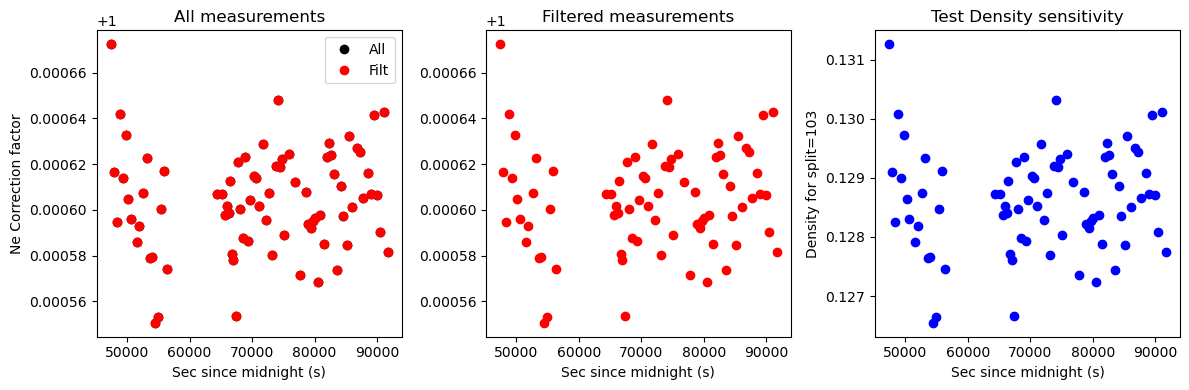

In [ ]:
filt=pf.filter_Ne_Line_neighbours(Corr_factor=df_combo['Ne_Corr'], 
                    number_av=5, offset=0.0002)
# Now lets plot this to see
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12,4))
ax1.plot(df_combo['sec since midnight'], df_combo['Ne_Corr'],   'ok', label='All')
ax1.plot(df_combo['sec since midnight'], filt,  'or', label='Kept')
ax1.legend()
ax2.plot(df_combo['sec since midnight'], filt,  'or', label='Kept')

test_split=103
split=filt*test_split
density_test=pf.calculate_density_cornell(temp='SupCrit', Split=split)
ax3.plot(df_combo['sec since midnight'].loc[density_test['Preferred D']>0],
         density_test['Preferred D'].loc[density_test['Preferred D']>0], 'ob')


ax1.set_xlabel('Sec since midnight (s)')
ax1.set_ylabel('Ne Correction factor')
ax1.set_title('All measurements')
ax2.set_xlabel('Sec since midnight (s)')
ax2.set_title('Filtered measurements')
ax3.set_xlabel('Sec since midnight (s)')
ax3.set_ylabel('Density for split=' + str(test_split))
ax3.set_title('Test Density sensitivity')
fig.tight_layout()

## Now lets make a regression against time
- We take this time regression and then apply to our diad fits

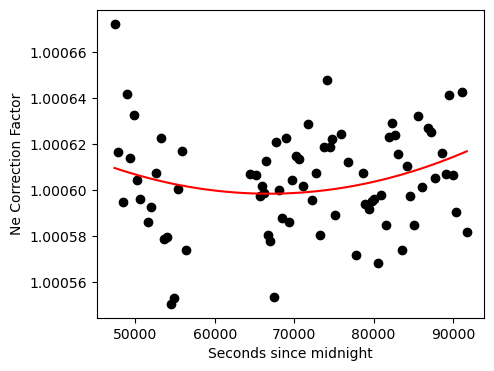

In [ ]:
df_combo_filt=df_combo[density_test['Preferred D']>0]
model=pf.reg_Ne_lines_time(df=df_combo_filt, N_poly=2, fit='poly')

## SAving as pickle, can then load as a pickle

In [ ]:
import pickle
with open('Ne_Line_Regression_Example_cali.pck', 'wb') as file_handle:
    pickle.dump(model, file_handle)